In [1]:
import tfmindi as tm

/home/luna.kuleuven.be/u0166574/.local/share/hatch/env/virtual/tfmindi/OeeCTRxT/docs/lib/python3.12/site-packages/numba/cpython/old_hashing.py:477: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)


In [2]:
adata = tm.load_h5ad("sample_adata.h5ad")

In [3]:
patterns = tm.tl.create_patterns(adata)

Creating patterns for 21 clusters...


In [4]:
patterns["8"]

Pattern(cluster=8, n_seqlets=9, len=21, consensus='GTGGCATGTGGCAGCGGTGG...', mean_ic=0.82)

In [5]:
adata.obs.head(3)

,example_idx,start,end,attribution,p-value,seqlet_matrix,seqlet_oh,example_oh,example_contrib,leiden,mean_contrib,seqlet_dbd,cluster_dbd
0,24,59,76,-0.467904,1.887379e-15,"[[-0.0011337847152989144, 0.039029417622873375...","[[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.00199191365391016, 0.00013025905354879797,...",0,0.201815,NaN,NaN
1,31,178,198,1.294061,2.467105e-04,"[[0.22378262176327485, 0.02587442114950032, -0...","[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.001131125376559794, -0.000327722518704831...",1,0.212963,NaN,NaN
2,28,299,318,-0.457312,7.206342e-04,"[[0.09934498645434618, -0.09970337874610243, 0...","[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[[-0.0005060430848971009, -0.00117746787145733...",2,0.170461,NaN,C2H2 ZF; Homeodomain


In [6]:
# topic model
model, region_topic, count_table = tm.tl.run_topic_modeling(adata, n_topics=5, n_iter=10, filter_unknown=False)

INFO:lda:n_documents: 35
INFO:lda:vocab_size: 21
INFO:lda:n_words: 295
INFO:lda:n_topics: 5
INFO:lda:n_iter: 10
INFO:lda:<0> log likelihood: -1553


INFO:lda:<9> log likelihood: -1088


Using 295 deduplicated seqlets across 35 regions
Count matrix shape: (35, 21) (regions × clusters)
Fitting LDA model with 5 topics...


In [7]:
count_table

col_0,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
13,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,0,0,0,0,2,3,0,2,0,0,...,0,0,0,0,2,0,0,0,1,0


In [17]:
# evaluate topic model
likelihoods = tm.tl.evaluate_topic_models(adata)

INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 10
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1374
INFO:lda:<10> log likelihood: -911
INFO:lda:<20> log likelihood: -915


Evaluating 8 different topic models...
Training model with 10 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 10 topics...


INFO:lda:<30> log likelihood: -888
INFO:lda:<40> log likelihood: -922
INFO:lda:<50> log likelihood: -915
INFO:lda:<60> log likelihood: -853
INFO:lda:<70> log likelihood: -928
INFO:lda:<80> log likelihood: -882
INFO:lda:<90> log likelihood: -942
INFO:lda:<100> log likelihood: -902
INFO:lda:<110> log likelihood: -885
INFO:lda:<120> log likelihood: -900
INFO:lda:<130> log likelihood: -908
INFO:lda:<140> log likelihood: -898
INFO:lda:<149> log likelihood: -937
INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 15
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1464
INFO:lda:<10> log likelihood: -998
INFO:lda:<20> log likelihood: -997


Training model with 15 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 15 topics...


INFO:lda:<30> log likelihood: -970
INFO:lda:<40> log likelihood: -1022
INFO:lda:<50> log likelihood: -985
INFO:lda:<60> log likelihood: -975
INFO:lda:<70> log likelihood: -1049
INFO:lda:<80> log likelihood: -1003
INFO:lda:<90> log likelihood: -999
INFO:lda:<100> log likelihood: -1049
INFO:lda:<110> log likelihood: -975
INFO:lda:<120> log likelihood: -1061
INFO:lda:<130> log likelihood: -980
INFO:lda:<140> log likelihood: -942
INFO:lda:<149> log likelihood: -1050
INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 20
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1535
INFO:lda:<10> log likelihood: -1097
INFO:lda:<20> log likelihood: -1116


Training model with 20 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 20 topics...


INFO:lda:<30> log likelihood: -1068
INFO:lda:<40> log likelihood: -1054
INFO:lda:<50> log likelihood: -1070
INFO:lda:<60> log likelihood: -1111
INFO:lda:<70> log likelihood: -1138
INFO:lda:<80> log likelihood: -1061
INFO:lda:<90> log likelihood: -1103
INFO:lda:<100> log likelihood: -1135
INFO:lda:<110> log likelihood: -1101
INFO:lda:<120> log likelihood: -1095
INFO:lda:<130> log likelihood: -1092
INFO:lda:<140> log likelihood: -1085
INFO:lda:<149> log likelihood: -1100
INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 25
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1588
INFO:lda:<10> log likelihood: -1153
INFO:lda:<20> log likelihood: -1153


Training model with 25 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 25 topics...


INFO:lda:<30> log likelihood: -1162
INFO:lda:<40> log likelihood: -1132
INFO:lda:<50> log likelihood: -1119
INFO:lda:<60> log likelihood: -1157
INFO:lda:<70> log likelihood: -1179
INFO:lda:<80> log likelihood: -1141
INFO:lda:<90> log likelihood: -1118
INFO:lda:<100> log likelihood: -1172
INFO:lda:<110> log likelihood: -1148
INFO:lda:<120> log likelihood: -1217
INFO:lda:<130> log likelihood: -1192
INFO:lda:<140> log likelihood: -1167
INFO:lda:<149> log likelihood: -1144
INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 30
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1605
INFO:lda:<10> log likelihood: -1197
INFO:lda:<20> log likelihood: -1165


Training model with 30 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 30 topics...


INFO:lda:<30> log likelihood: -1236
INFO:lda:<40> log likelihood: -1217
INFO:lda:<50> log likelihood: -1207
INFO:lda:<60> log likelihood: -1229
INFO:lda:<70> log likelihood: -1246
INFO:lda:<80> log likelihood: -1217
INFO:lda:<90> log likelihood: -1207
INFO:lda:<100> log likelihood: -1251
INFO:lda:<110> log likelihood: -1201
INFO:lda:<120> log likelihood: -1223
INFO:lda:<130> log likelihood: -1222
INFO:lda:<140> log likelihood: -1210
INFO:lda:<149> log likelihood: -1186
INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 35
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1656
INFO:lda:<10> log likelihood: -1226
INFO:lda:<20> log likelihood: -1259


Training model with 35 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 35 topics...


INFO:lda:<30> log likelihood: -1237
INFO:lda:<40> log likelihood: -1319
INFO:lda:<50> log likelihood: -1245
INFO:lda:<60> log likelihood: -1278
INFO:lda:<70> log likelihood: -1322
INFO:lda:<80> log likelihood: -1227
INFO:lda:<90> log likelihood: -1289
INFO:lda:<100> log likelihood: -1266
INFO:lda:<110> log likelihood: -1235
INFO:lda:<120> log likelihood: -1259
INFO:lda:<130> log likelihood: -1275
INFO:lda:<140> log likelihood: -1260
INFO:lda:<149> log likelihood: -1238
INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 40
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1669
INFO:lda:<10> log likelihood: -1270
INFO:lda:<20> log likelihood: -1262


Training model with 40 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 40 topics...


INFO:lda:<30> log likelihood: -1298
INFO:lda:<40> log likelihood: -1280
INFO:lda:<50> log likelihood: -1311
INFO:lda:<60> log likelihood: -1332
INFO:lda:<70> log likelihood: -1331
INFO:lda:<80> log likelihood: -1291
INFO:lda:<90> log likelihood: -1313
INFO:lda:<100> log likelihood: -1329
INFO:lda:<110> log likelihood: -1279
INFO:lda:<120> log likelihood: -1289
INFO:lda:<130> log likelihood: -1324
INFO:lda:<140> log likelihood: -1307
INFO:lda:<149> log likelihood: -1300
INFO:lda:n_documents: 33
INFO:lda:vocab_size: 17
INFO:lda:n_words: 234
INFO:lda:n_topics: 50
INFO:lda:n_iter: 150
INFO:lda:<0> log likelihood: -1713
INFO:lda:<10> log likelihood: -1338
INFO:lda:<20> log likelihood: -1342


Training model with 50 topics...
Filtered 61 seqlets with unknown DBD annotations
Using 234 deduplicated seqlets across 33 regions
Count matrix shape: (33, 17) (regions × clusters)
Fitting LDA model with 50 topics...


INFO:lda:<30> log likelihood: -1326
INFO:lda:<40> log likelihood: -1341
INFO:lda:<50> log likelihood: -1360
INFO:lda:<60> log likelihood: -1378
INFO:lda:<70> log likelihood: -1406
INFO:lda:<80> log likelihood: -1383
INFO:lda:<90> log likelihood: -1389
INFO:lda:<100> log likelihood: -1394
INFO:lda:<110> log likelihood: -1354
INFO:lda:<120> log likelihood: -1371
INFO:lda:<130> log likelihood: -1344
INFO:lda:<140> log likelihood: -1387
INFO:lda:<149> log likelihood: -1366


Model with 10 topics: log-likelihood = 3143.62
Model with 15 topics: log-likelihood = 3516.68
Model with 20 topics: log-likelihood = 3642.00
Model with 25 topics: log-likelihood = 3649.23
Model with 30 topics: log-likelihood = 3562.22
Model with 35 topics: log-likelihood = 3408.40
Model with 40 topics: log-likelihood = 3208.19
Model with 50 topics: log-likelihood = 2697.28


In [19]:
topic_cluster = tm.tl.get_topic_cluster_matrix(model)

TypeError: get_topic_cluster_matrix() missing 1 required positional argument: 'count_table'

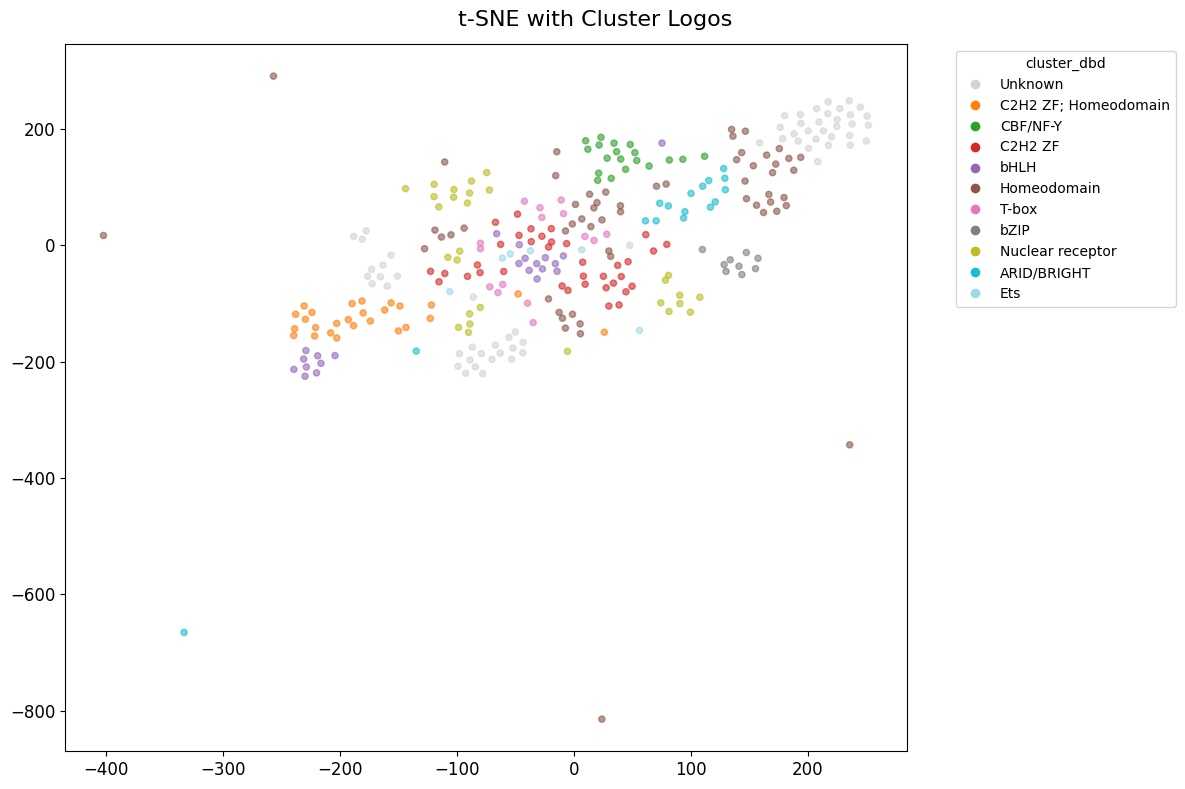

In [6]:
tm.pl.tsne(
    adata,
    color_by="cluster_dbd",
    show_legend=True,
    title="t-SNE with Cluster Logos",
    xlabel=None,
    ylabel=None,
    width=12,
)

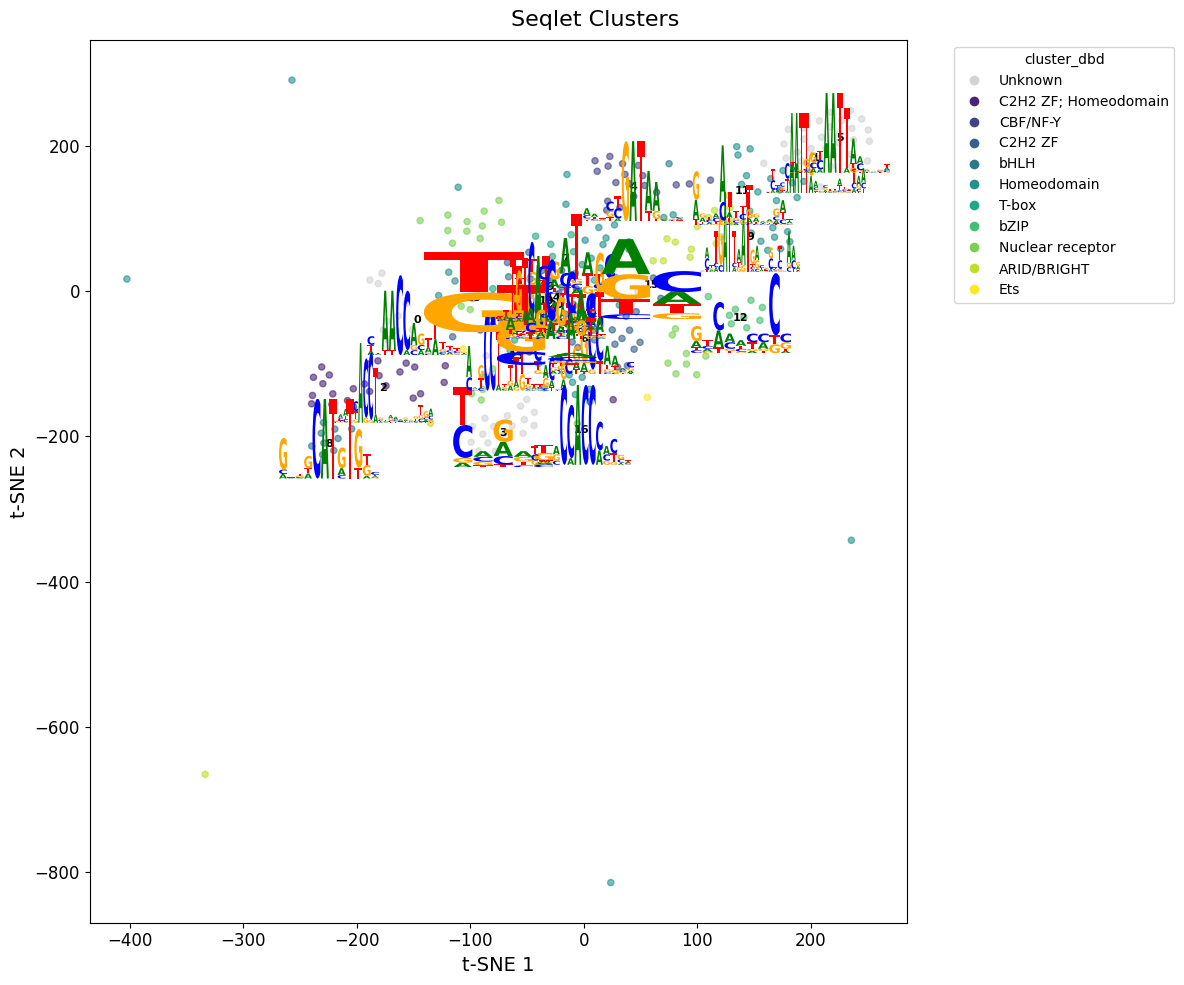

In [11]:
%matplotlib inline
tm.pl.tsne_logos(
    adata,
    patterns,
    width=12,
    height=10,
    cmap="viridis",
)